<br>
<br>
<br>
<br>

# Part 3 : Categories Analyze

<br>
<br>
<br>
<br>

<br>
<br>
<br>

# Import libarary

<br>
<br>
<br>

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from GlobalFunction import *


pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('float_format', '{:f}'.format)

sns.set(style="white", color_codes=True)

<br>
<br>
<br>

# Read The Data

<br>
<br>
<br>

In [2]:
df = readCSV("timingData.csv")
trainData = readCSV("timingTrainData.csv")
df.head()

,ID,name,category,main_category,deadline,launched,state,backers,country,pledged,goal,state_value,hour,day,month,year,weekday,duration
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,2015-10-09 00:00:00,2015-08-11 12:12:28,failed,0,GB,0.000000,1533.950000,0,12,11,8,2015,1,59
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,2017-11-01 00:00:00,2017-09-02 04:43:57,failed,15,US,2421.000000,30000.000000,0,4,2,9,2017,5,60
2,1000004038,Where is Hank?,Narrative Film,Film & Video,2013-02-26 00:00:00,2013-01-12 00:20:50,failed,3,US,220.000000,45000.000000,0,0,12,1,2013,5,45
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,2012-04-16 00:00:00,2012-03-17 03:24:11,failed,1,US,1.000000,5000.000000,0,3,17,3,2012,5,30
4,1000014025,Monarch Espresso Bar,Restaurants,Food,2016-04-01 00:00:00,2016-02-26 13:38:27,successful,224,US,52375.000000,50000.000000,1,13,26,2,2016,4,35


<br>
<br>

## Describe
<br>
<br>

In [3]:
getDescribe(df)

,attribute,ID,name,category,main_category,deadline,launched,state,backers,country,pledged,goal,state_value,hour,day,month,year,weekday,duration
0,count,331672.000000,331672,331672,331672,331672,331672,331672,331672.000000,331672,331672.000000,331672.000000,331672.000000,331672.000000,331672.000000,331672.000000,331672.000000,331672.000000,331672.000000
1,unique,NaN,329594,159,15,3102,331252,2,NaN,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,top,NaN,New EP/Music Development,Product Design,Film & Video,2014-08-08 00:00:00,2013-07-24 20:45:50,failed,NaN,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,freq,NaN,15,18680,56526,612,2,197716,NaN,261358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mean,1074270473.552027,NaN,NaN,NaN,NaN,NaN,NaN,116.382580,NaN,9943.549278,41509.658749,0.403881,13.087336,15.285421,6.416149,2014.180024,2.421805,33.954889
5,std,619193075.107324,NaN,NaN,NaN,NaN,NaN,NaN,965.431577,NaN,96733.367226,1108934.642072,0.490675,7.715452,8.814433,3.306967,1.930916,1.762932,12.713279
6,min,5971.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.010000,0.000000,0.000000,1.000000,1.000000,2009.000000,0.000000,1.000000
7,25%,537171096.500000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,50.000000,2000.000000,0.000000,5.000000,8.000000,4.000000,2013.000000,1.000000,30.000000
8,50%,1074574892.500000,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,NaN,788.000000,5000.000000,0.000000,16.000000,15.000000,6.000000,2014.000000,2.000000,30.000000
9,75%,1609843457.750000,NaN,NaN,NaN,NaN,NaN,NaN,63.000000,NaN,4608.000000,15000.000000,1.000000,20.000000,23.000000,9.000000,2016.000000,4.000000,36.000000


<br>
<br>
<br>
<br>

# Part 3.1 : Create Featuers

<br>
<br>
<br>
<br>


### we are going to add those columns now:
    
   
1. **count_category:** count of projects in this category and main category

1. **success_count_category:** count of projects in this category and main category that success

1. **failed_count_category:** count of projects in this category and main category that falied

1. **backers_mean_category:** mean of backers to this category

1. **backers_median_category:** mean of backers to this category

1. **goal_median_category:**  mean of goal to this category

1. **pledged_median_category:**  mean of pledged to this category

1. **success_percent_category:** percent of success projects in this category


In [4]:
categoriesData = trainData[['main_category', 'category']].copy()
categoriesData = categoriesData.drop_duplicates().reset_index()
categoriesData = categoriesData.drop(columns=['index'])
categoriesData.head()

,main_category,category
0,Publishing,Poetry
1,Film & Video,Narrative Film
2,Music,Music
3,Food,Food
4,Publishing,Nonfiction


In [5]:
categoriesData['count_category'] = categoriesData.apply(
    lambda row : trainData[(trainData.category == row.category) &
                           (trainData.main_category == row.main_category)].ID.count(),
    axis= 1).astype('int64')
categoriesData.head()

,main_category,category,count_category
0,Publishing,Poetry,977
1,Film & Video,Narrative Film,4230
2,Music,Music,9490
3,Food,Food,8715
4,Publishing,Nonfiction,5775


In [6]:
categoriesData['success_count_category'] = categoriesData.apply(
    lambda row : trainData[(trainData.state == 'successful') &
                           (trainData.category == row.category) &
                           (trainData.main_category == row.main_category)].ID.count(),
    axis= 1).astype('int64')
categoriesData.head()

,main_category,category,count_category,success_count_category
0,Publishing,Poetry,977,376
1,Film & Video,Narrative Film,4230,1790
2,Music,Music,9490,4873
3,Food,Food,8715,2924
4,Publishing,Nonfiction,5775,1700


In [7]:
categoriesData['failed_count_category'] = categoriesData.apply(
    lambda row : trainData[(trainData.state == 'failed') &
                           (trainData.category == row.category) &
                           (trainData.main_category == row.main_category)].ID.count(),
    axis= 1).astype('int64')
categoriesData.head()

,main_category,category,count_category,success_count_category,failed_count_category
0,Publishing,Poetry,977,376,601
1,Film & Video,Narrative Film,4230,1790,2440
2,Music,Music,9490,4873,4617
3,Food,Food,8715,2924,5791
4,Publishing,Nonfiction,5775,1700,4075


In [8]:
categoriesData['backers_median_category'] = categoriesData.apply(
    lambda row : trainData[(trainData.main_category == row.main_category) &
                           (trainData.category == row.category)].backers.median(),
    axis=1)
categoriesData.head()

,main_category,category,count_category,success_count_category,failed_count_category,backers_median_category
0,Publishing,Poetry,977,376,601,6.000000
1,Film & Video,Narrative Film,4230,1790,2440,24.000000
2,Music,Music,9490,4873,4617,20.000000
3,Food,Food,8715,2924,5791,15.000000
4,Publishing,Nonfiction,5775,1700,4075,7.000000


In [9]:
categoriesData['backers_mean_category'] = categoriesData.apply(
    lambda row : trainData[(trainData.main_category == row.main_category) &
                           (trainData.category == row.category)].backers.mean(),
    axis=1)
categoriesData.head()

,main_category,category,count_category,success_count_category,failed_count_category,backers_median_category,backers_mean_category
0,Publishing,Poetry,977,376,601,6.000000,26.084954
1,Film & Video,Narrative Film,4230,1790,2440,24.000000,117.156265
2,Music,Music,9490,4873,4617,20.000000,68.186828
3,Food,Food,8715,2924,5791,15.000000,69.618474
4,Publishing,Nonfiction,5775,1700,4075,7.000000,46.185455


In [10]:
categoriesData['goal_median_category'] = categoriesData.apply(
    lambda row : trainData[(trainData.main_category == row.main_category) &
                           (trainData.category == row.category)].goal.median(),
    axis=1)
categoriesData.head()

,main_category,category,count_category,success_count_category,failed_count_category,backers_median_category,backers_mean_category,goal_median_category
0,Publishing,Poetry,977,376,601,6.000000,26.084954,2000.000000
1,Film & Video,Narrative Film,4230,1790,2440,24.000000,117.156265,10000.000000
2,Music,Music,9490,4873,4617,20.000000,68.186828,5000.000000
3,Food,Food,8715,2924,5791,15.000000,69.618474,8500.000000
4,Publishing,Nonfiction,5775,1700,4075,7.000000,46.185455,5000.000000


In [11]:
categoriesData['pledged_median_category'] = categoriesData.apply(
    lambda row : trainData[(trainData.main_category == row.main_category) &
                           (trainData.category == row.category)].pledged.median(),
    axis=1)
categoriesData.head()

,main_category,category,count_category,success_count_category,failed_count_category,backers_median_category,backers_mean_category,goal_median_category,pledged_median_category
0,Publishing,Poetry,977,376,601,6.000000,26.084954,2000.000000,217.000000
1,Film & Video,Narrative Film,4230,1790,2440,24.000000,117.156265,10000.000000,2075.000000
2,Music,Music,9490,4873,4617,20.000000,68.186828,5000.000000,1020.055000
3,Food,Food,8715,2924,5791,15.000000,69.618474,8500.000000,776.000000
4,Publishing,Nonfiction,5775,1700,4075,7.000000,46.185455,5000.000000,340.000000


In [12]:
categoriesData['success_percent_category'] = categoriesData.apply(
    lambda row : (row.success_count_category) / (row.count_category), axis=1)
categoriesData.head()

,main_category,category,count_category,success_count_category,failed_count_category,backers_median_category,backers_mean_category,goal_median_category,pledged_median_category,success_percent_category
0,Publishing,Poetry,977,376,601,6.000000,26.084954,2000.000000,217.000000,0.384852
1,Film & Video,Narrative Film,4230,1790,2440,24.000000,117.156265,10000.000000,2075.000000,0.423168
2,Music,Music,9490,4873,4617,20.000000,68.186828,5000.000000,1020.055000,0.513488
3,Food,Food,8715,2924,5791,15.000000,69.618474,8500.000000,776.000000,0.335513
4,Publishing,Nonfiction,5775,1700,4075,7.000000,46.185455,5000.000000,340.000000,0.294372


<br>
<br>
<br>
<br>

# Part 3.2 : Data Visualization

<br>
<br>
<br>
<br>

In [13]:
scalingCategoriesData = getScalingData(categoriesData)

In [14]:
def plotCategoriesCompare(data,col1,col2):
    plt.figure(figsize=(12,6))
    ax1 = sns.regplot(x=data[col1].values,
                y=data[col2].values,
                line_kws={"color":"c","alpha":0.7,"lw":5})
    ax1.set_title(col1 +  ' vs ' + col2)
    ax1.set_xlabel(col1)
    ax1.set_ylabel(col2)

    fig, ax = plt.subplots(figsize=(12,6))
    data.groupby(['main_category']).mean()[col1].plot(ax=ax,legend=True, color = 'c')
    data.groupby(['main_category']).mean()[col2].plot(ax=ax,legend=True)
    plt.show() 
    

## Plotting backers and goal median to category

In [15]:
scalingCategoriesData

,main_category,category,count_category,success_count_category,failed_count_category,backers_median_category,backers_mean_category,goal_median_category,pledged_median_category,success_percent_category
0,Publishing,Poetry,0.079309,0.062595,0.083229,0.036496,0.028319,0.045598,0.013337,0.405193
1,Film & Video,Narrative Film,0.345556,0.300522,0.339607,0.167883,0.176530,0.318284,0.133340,0.455267
2,Music,Music,0.776068,0.819283,0.643106,0.138686,0.096836,0.147856,0.065204,0.573300
3,Food,Food,0.712637,0.491334,0.806775,0.102190,0.099166,0.267156,0.049441,0.340716
4,Publishing,Nonfiction,0.472009,0.285378,0.567545,0.043796,0.061031,0.147856,0.021281,0.286951
...,...,...,...,...,...,...,...,...,...,...
160,Crafts,Pottery,0.003601,0.004038,0.002788,0.124088,0.056003,0.079847,0.057721,0.605937
161,Crafts,Quilts,0.003765,0.001346,0.005298,0.025547,0.017452,0.130813,0.007460,0.192662
162,Crafts,Embroidery,0.003765,0.000673,0.005855,0.010949,0.006271,0.080172,0.002599,0.095859
163,Music,Chiptune,0.001391,0.002861,0.000000,0.459854,0.964659,0.079684,0.193083,1.000000


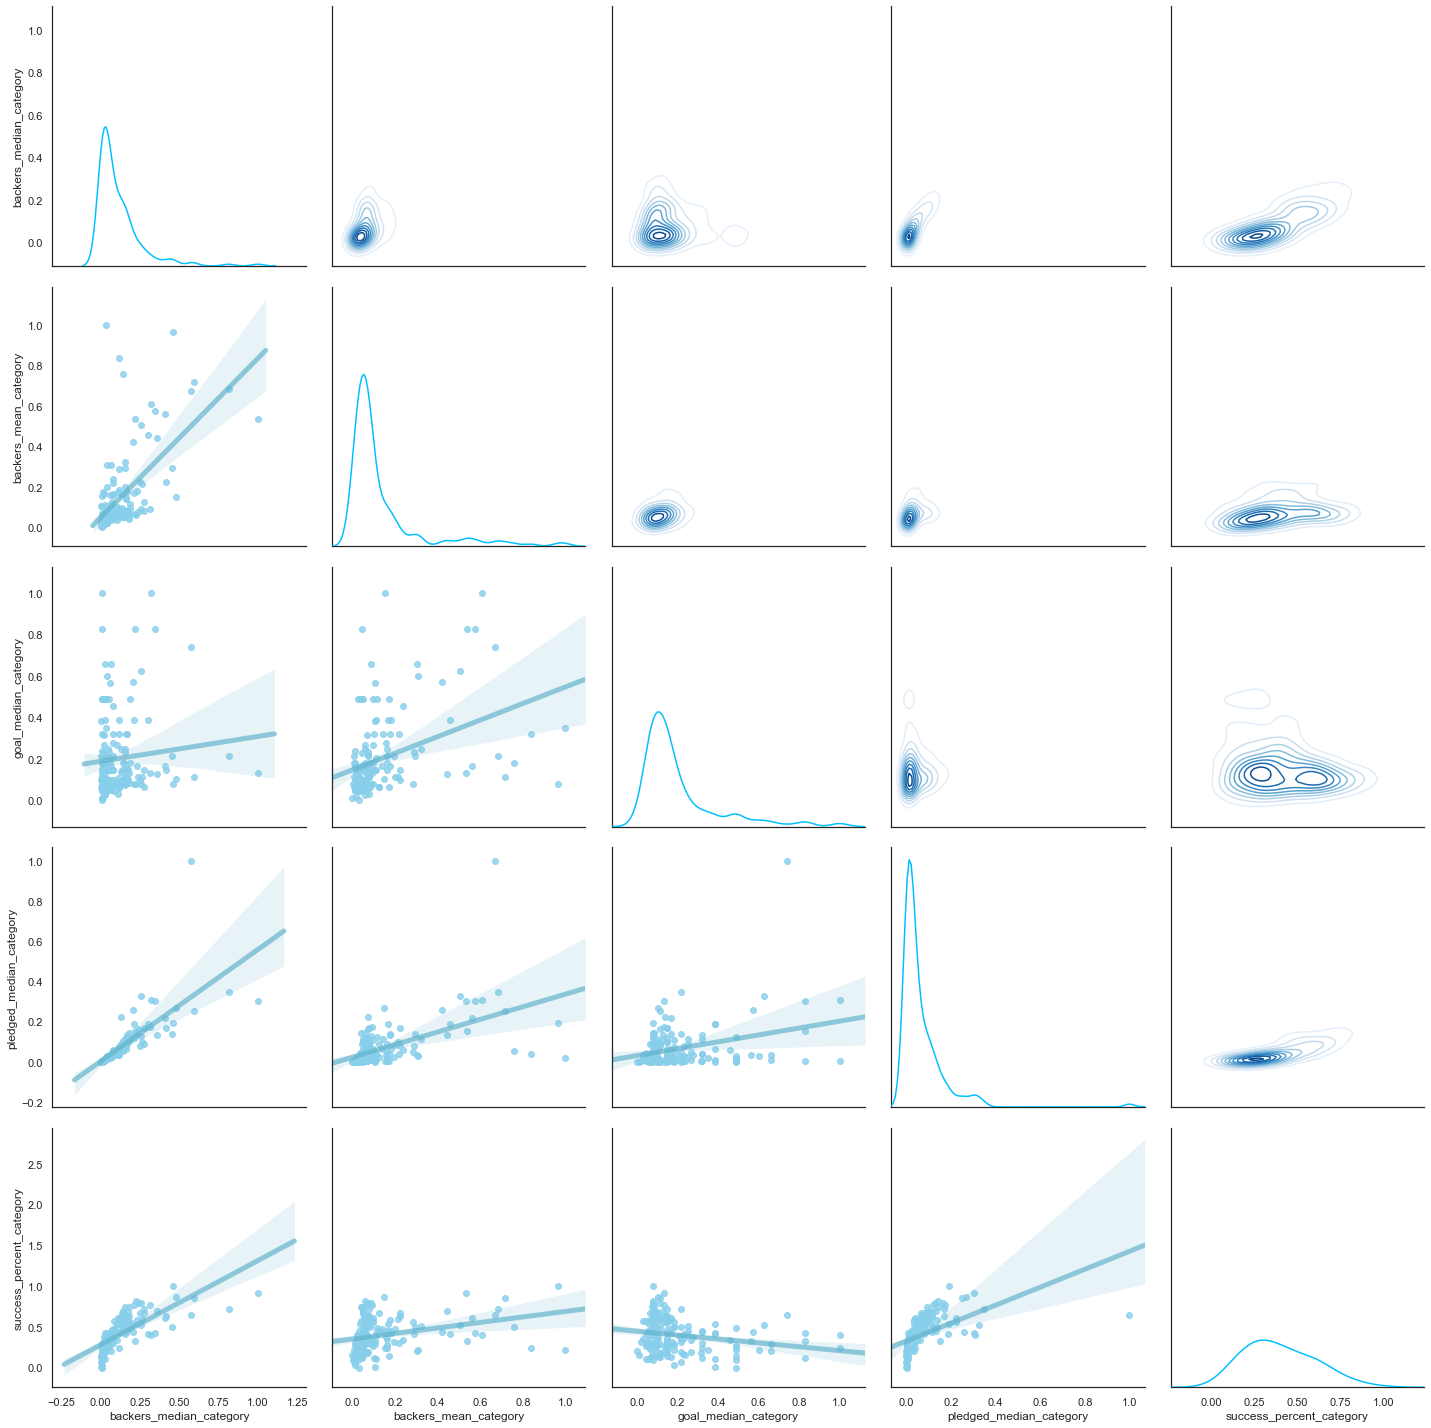

In [16]:
tempData = scalingCategoriesData[['main_category','backers_median_category','backers_mean_category',
                                  'goal_median_category','pledged_median_category','success_percent_category']]

g = sns.PairGrid(tempData, palette='GnBu',height=4,)
g = g.map_upper(sns.kdeplot,cmap = plt.cm.Blues)
g = g.map_lower(sns.regplot,line_kws={"color":"c","alpha":0.7,"lw":5}, color = 'skyblue')
g = g.map_diag(sns.kdeplot, color = 'deepskyblue')
g

## Plotting backers and pledged median to category

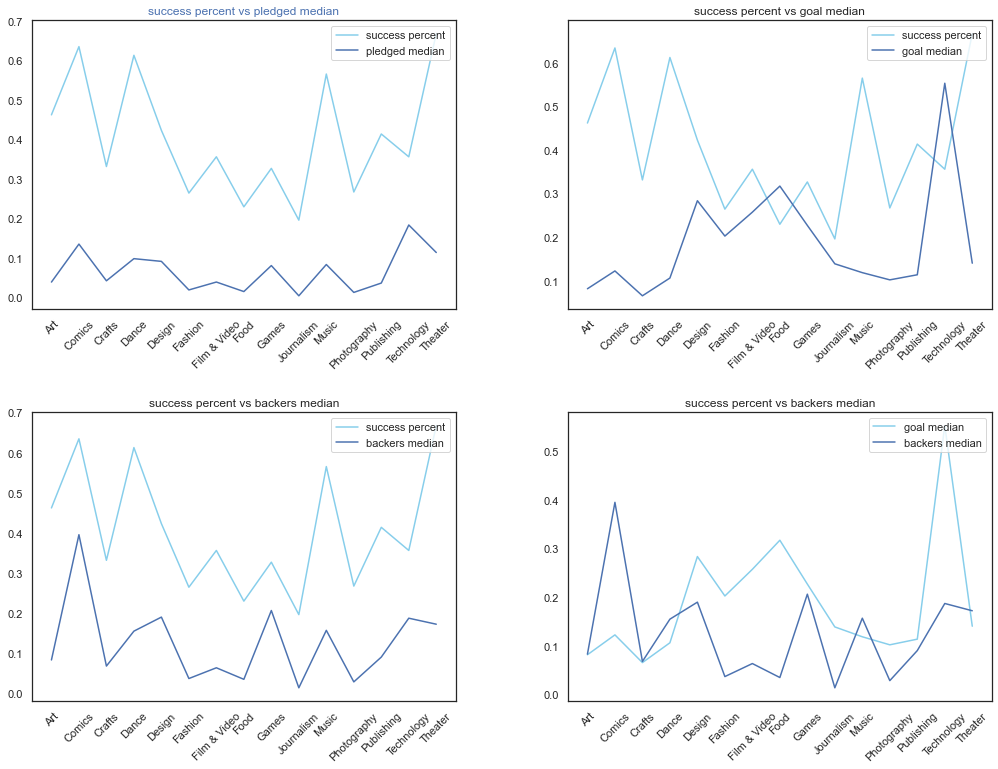

In [17]:
tempData = scalingCategoriesData.groupby(['main_category']).mean()

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows = 2 , ncols = 2 , figsize=(16,12))
fig.tight_layout(pad=8.0)

ax1.plot(tempData.success_percent_category, label='success percent', color = 'skyblue')
ax1.plot(tempData.pledged_median_category, label='pledged median', color = 'b')
ax1.set_title('success percent vs pledged median', color = 'b')
ax1.legend(loc='upper right')
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)

ax2.plot(tempData.success_percent_category, label='success percent', color = 'skyblue')
ax2.plot(tempData.goal_median_category, label='goal median', color = 'b')
ax2.set_title('success percent vs goal median')
ax2.legend(loc='upper right')
for tick in ax2.get_xticklabels():
    tick.set_rotation(45)


ax3.plot(tempData.success_percent_category, label='success percent', color = 'skyblue')
ax3.plot(tempData.backers_median_category, label='backers median', color = 'b')
ax3.set_title('success percent vs backers median')
ax3.legend(loc='upper right')
for tick in ax3.get_xticklabels():
    tick.set_rotation(45)


ax4.plot(tempData.goal_median_category, label='goal median', color = 'skyblue')
ax4.plot(tempData.backers_median_category, label='backers median', color = 'b')
ax4.set_title('success percent vs backers median')
ax4.legend(loc='upper right')
for tick in ax4.get_xticklabels():
    tick.set_rotation(45)

    


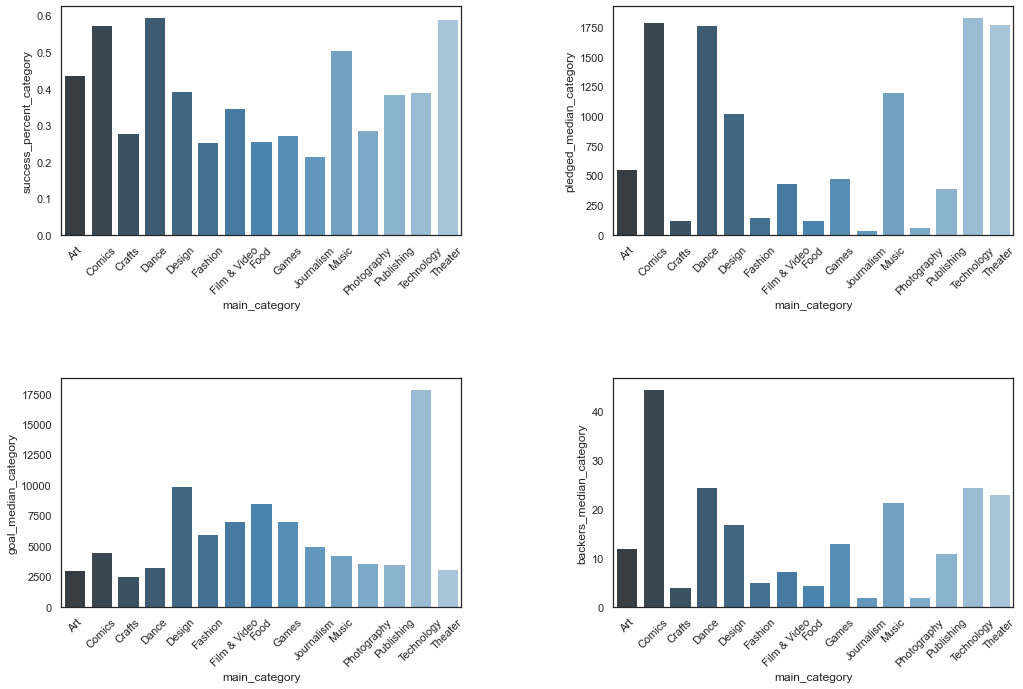

In [18]:
mainCategoriesData = categoriesData.copy().groupby('main_category').median()
mainCategoriesData['main_category'] = mainCategoriesData.index

fig , ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize = (17,12))
fig.tight_layout(pad=12.0)

sns.barplot(x="main_category", y="success_percent_category", data=mainCategoriesData,palette="Blues_d", ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

sns.barplot(x="main_category", y="pledged_median_category", data=mainCategoriesData,palette="Blues_d", ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

sns.barplot(x="main_category", y="goal_median_category", data=mainCategoriesData,palette="Blues_d", ax=ax3)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45)

sns.barplot(x="main_category", y="backers_median_category", data=mainCategoriesData,palette="Blues_d", ax=ax4)
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45)

plt.show()


In [19]:
mainCategoriesData.columns

Index(['count_category', 'success_count_category', 'failed_count_category', 'backers_median_category', 'backers_mean_category', 'goal_median_category', 'pledged_median_category', 'success_percent_category', 'main_category'], dtype='object')

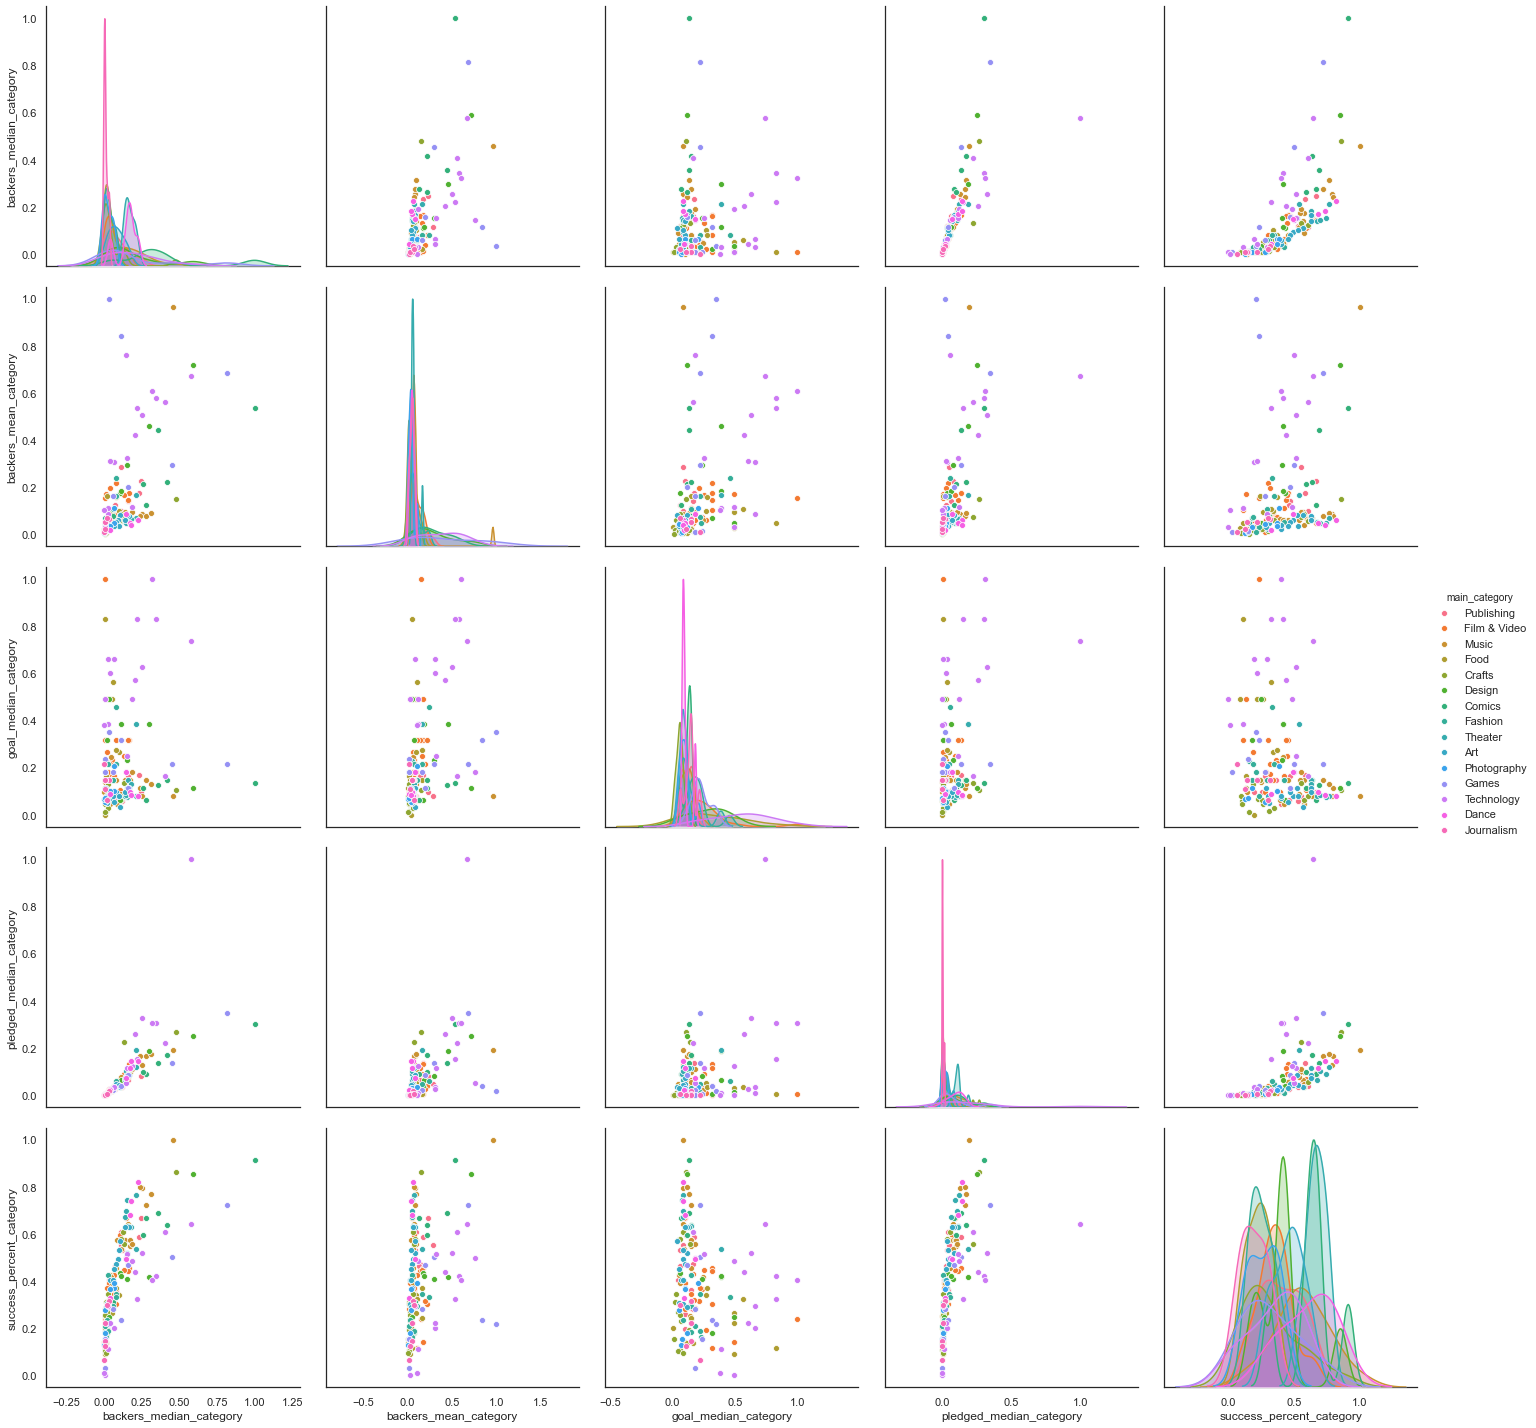

In [20]:
tempScaleCategoriesData = scalingCategoriesData.copy().drop(columns=['category','success_count_category','failed_count_category','count_category'])
sns.pairplot(tempScaleCategoriesData, hue = "main_category", height=4)
plt.show()

In [21]:
plotCorr(scalingCategoriesData)

,count_category,success_count_category,failed_count_category,backers_median_category,backers_mean_category,goal_median_category,pledged_median_category,success_percent_category
count_category,1,0.94,0.97,0.12,0.072,0.017,0.069,0.1
success_count_category,0.94,1,0.82,0.24,0.071,-0.051,0.15,0.28
failed_count_category,0.97,0.82,1,0.023,0.067,0.069,-0.004,-0.047
backers_median_category,0.12,0.24,0.023,1,0.62,0.092,0.78,0.74
backers_mean_category,0.072,0.071,0.067,0.62,1,0.39,0.56,0.31
goal_median_category,0.017,-0.051,0.069,0.092,0.39,1,0.31,-0.22
pledged_median_category,0.069,0.15,-0.004,0.78,0.56,0.31,1,0.56
success_percent_category,0.1,0.28,-0.047,0.74,0.31,-0.22,0.56,1


<br>

## after process our train data lets add the results to all data

<br>

In [22]:
dataToJoin = scalingCategoriesData[['main_category','category','backers_median_category',
                                    'backers_mean_category','success_percent_category','pledged_median_category','goal_median_category']]

In [23]:
df = df.join(dataToJoin.set_index( ['main_category','category']), on=['main_category','category'])

In [24]:
df.backers_median_category = df.backers_median_category.fillna(0.0)
df.backers_mean_category = df.backers_mean_category.fillna(0.0)
df.success_percent_category = df.success_percent_category.fillna(0.0)
df.pledged_median_category = df.pledged_median_category.fillna(0.0)
df.goal_median_category = df.goal_median_category.fillna(0.0)

In [25]:
writeCSV(categoriesData,'categoriesDataset.csv')

,main_category,category,count_category,success_count_category,failed_count_category,backers_median_category,backers_mean_category,goal_median_category,pledged_median_category,success_percent_category
0,Publishing,Poetry,977,376,601,6.000000,26.084954,2000.000000,217.000000,0.384852
1,Film & Video,Narrative Film,4230,1790,2440,24.000000,117.156265,10000.000000,2075.000000,0.423168
2,Music,Music,9490,4873,4617,20.000000,68.186828,5000.000000,1020.055000,0.513488
3,Food,Food,8715,2924,5791,15.000000,69.618474,8500.000000,776.000000,0.335513
4,Publishing,Nonfiction,5775,1700,4075,7.000000,46.185455,5000.000000,340.000000,0.294372
...,...,...,...,...,...,...,...,...,...,...
160,Crafts,Pottery,52,28,24,18.000000,43.096154,3004.795000,904.200000,0.538462
161,Crafts,Quilts,54,12,42,4.500000,19.407407,4500.000000,126.000000,0.222222
162,Crafts,Embroidery,54,8,46,2.500000,12.537037,3014.305000,50.740000,0.148148
163,Music,Chiptune,25,21,4,64.000000,601.440000,3000.000000,3000.000000,0.840000


In [26]:
writeCSV(df,'categoriesData.csv')
trainData = splitData(df,'categoriesTrainData.csv','categoriesTestData.csv')
trainData.shape

(238961, 23)

<br>
<br>
<br>
<br>


# conclusion :


## * Consider the category carefully

## * its important to do project in category that attract backers, num of backers is realy important to success

## * try to set a low goal to your project

## * Comics categoty get the most high median backers

## * we remember that Games category get the most high mean backers and we can see the diffrence between the values.

<br>
<br>
<br>
<br>
